In [1]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

/home/chandrahas/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from util import get_class_names, get_train_data, get_test_data, plot_images, plot_model

In [3]:
raw,class_names = get_class_names()
print(raw)
print(class_names)

Decoding file: data/batches.meta
[b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
num_classes = len(class_names)
print(num_classes)

10


In [5]:
# Hight and width of the images
IMAGE_SIZE = 32
# 3 channels, Red, Green and Blue
CHANNELS = 3

Fetch and decode data
--------

Load the training dataset. Labels are integers whereas class is one-hot encoded vectors.

In [6]:
images_train, labels_train, class_train = get_train_data()

Decoding file: data/data_batch_1
Decoding file: data/data_batch_2
Decoding file: data/data_batch_3
Decoding file: data/data_batch_4
Decoding file: data/data_batch_5


In [7]:
print(labels_train)

[6 9 9 ... 9 1 1]


In [8]:
print(class_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [9]:
images_test, labels_test, class_test = get_test_data()

Decoding file: data/test_batch


In [10]:
print("Training set size:\t",len(images_train))
print("Testing set size:\t",len(images_test))

Training set size:	 50000
Testing set size:	 10000


Now, The dataset has been loaded.

Simple CNN model
--------------------

In [11]:
def cnn_model():
    
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)))    
    model.add(Conv2D(32, (3, 3), activation='relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.summary()
    
    return model

In [12]:
# Building the model
model = cnn_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

Tranining the model
--

Saving the model after every epoch

In [13]:
checkpoint = ModelCheckpoint('best_model_simple.h5',  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=0, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor

Configuring model for training

In [14]:
model.compile(loss='categorical_crossentropy', # Better loss function for neural networks
              optimizer=Adam(lr=1.0e-4), # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) # Metrics to be evaluated by the model

Fitting the model

In [15]:
model_details = model.fit(images_train, class_train,
                    batch_size = 128, # number of samples per gradient update
                    epochs = 100, # number of iterations
                    validation_data= (images_test, class_test),
                    callbacks=[checkpoint],
                    verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 79s 2ms/step - loss: 1.9549 - acc: 0.2742 - val_loss: 1.6115 - val_acc: 0.4155
Epoch 2/100
50000/50000 [==============================] - 79s 2ms/step - loss: 1.5874 - acc: 0.4152 - val_loss: 1.4540 - val_acc: 0.4674
Epoch 3/100
50000/50000 [==============================] - 80s 2ms/step - loss: 1.4651 - acc: 0.4660 - val_loss: 1.3704 - val_acc: 0.4984
Epoch 4/100
50000/50000 [==============================] - 81s 2ms/step - loss: 1.3924 - acc: 0.4963 - val_loss: 1.2909 - val_acc: 0.5413
Epoch 5/100
50000/50000 [==============================] - 80s 2ms/step - loss: 1.3316 - acc: 0.5232 - val_loss: 1.2446 - val_acc: 0.5577
Epoch 6/100
50000/50000 [==============================] - 83s 2ms/step - loss: 1.2818 - acc: 0.5418 - val_loss: 1.1830 - val_acc: 0.5856
Epoch 7/100
50000/50000 [==============================] - 83s 2ms/step - loss: 1.2395 - acc: 0.5566 - val_loss: 1.1558 - 

50000/50000 [==============================] - 82s 2ms/step - loss: 0.4589 - acc: 0.8377 - val_loss: 0.6299 - val_acc: 0.7866
Epoch 60/100
50000/50000 [==============================] - 83s 2ms/step - loss: 0.4497 - acc: 0.8400 - val_loss: 0.6400 - val_acc: 0.7802
Epoch 61/100
50000/50000 [==============================] - 82s 2ms/step - loss: 0.4460 - acc: 0.8434 - val_loss: 0.6283 - val_acc: 0.7869
Epoch 62/100
50000/50000 [==============================] - 82s 2ms/step - loss: 0.4371 - acc: 0.8441 - val_loss: 0.6323 - val_acc: 0.7850
Epoch 63/100
50000/50000 [==============================] - 82s 2ms/step - loss: 0.4342 - acc: 0.8461 - val_loss: 0.6238 - val_acc: 0.7886
Epoch 64/100
50000/50000 [==============================] - 83s 2ms/step - loss: 0.4247 - acc: 0.8492 - val_loss: 0.6306 - val_acc: 0.7880
Epoch 65/100
50000/50000 [==============================] - 82s 2ms/step - loss: 0.4220 - acc: 0.8515 - val_loss: 0.6270 - val_acc: 0.7861
Epoch 66/100
50000/50000 [==============

In [16]:
scores = model.evaluate(images_test, class_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 79.49%


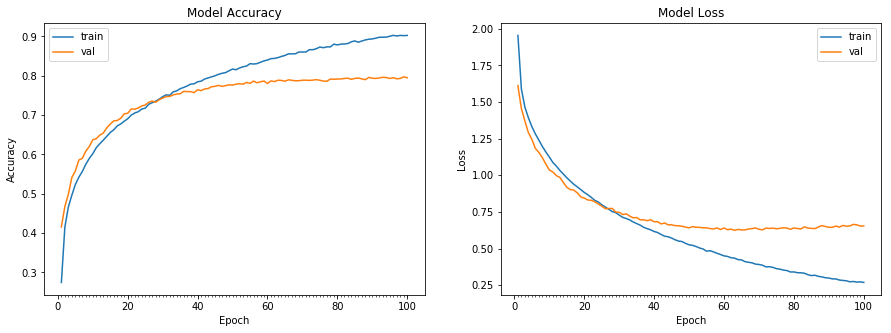

In [17]:
plot_model(model_details)

In [18]:
class_pred = model.predict(images_test, batch_size=32)
print(class_pred[0])

[3.1877487e-04 5.2080570e-05 7.7033212e-04 6.2706959e-01 1.8469931e-05
 3.6764145e-01 2.5785859e-03 7.1907422e-04 8.2654378e-04 5.0723629e-06]


In [19]:
labels_pred = np.argmax(class_pred,axis=1)
print(labels_pred)

[3 8 8 ... 5 1 7]


In [20]:
correct = (labels_pred == labels_test)
print(correct)
print("Number of correct predictions: %d" % sum(correct))

[ True  True  True ...  True  True  True]
Number of correct predictions: 7949


In [21]:
num_images = len(correct)
print("Accuracy: %.2f%%" % ((sum(correct)*100)/num_images))

Accuracy: 79.49%
